In [1]:
import librosa
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
no_MFCC=13
no_MFCC_sample=20


In [3]:
def get_labels(path):
    labels=os.listdir(path)
    label_indices=np.arange(0,len(labels))
    return labels, label_indices, to_categorical(label_indices)

def speech2mfcc(file_path,max_len=11):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    #wave=wave[::5]
    mfcc=librosa.feature.mfcc(wave,sr=sr, n_mfcc=no_MFCC)
    if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
        pad_width=max_len-mfcc.shape[1]
        mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')
    else:
        mfcc=mfcc[:,:max_len]
    return mfcc

def save_data_to_array(path, data_path, max_len=11):
    labels,_,_=get_labels(path)

    for label in labels:
        mfcc_vectors=[]

        speechfiles=[path +"\\"+ label + '\\' + speech for speech in os.listdir(path+'\\'+label)]
        for speech in tqdm(speechfiles,"Saving vectors to label -'{}'".format(label)):
            wave, sr= librosa.load(speech, mono=True, sr=None)
            mfcc=speech2mfcc(speech,max_len=max_len )
            mfcc_vectors.append(mfcc)
            
        print(np.shape(mfcc_vectors))
        np.save(data_path+"\\"+label+'.npy',mfcc_vectors)


In [88]:

SOUND_PATH="F:\\MAHBUB\\STUDY\\Student_researches\\Rakib\\Vowel_Data\\Vowel_sound"
DATA_PATH="F:\\MAHBUB\\STUDY\\Student_researches\\Rakib\\Vowel_Data\\Vowel_MFCC"

#SOUND_PATH="F:\\MAHBUB\\STUDY\\Student_researches\\Rakib\\Word_Data\\Word_sound"
#DATA_PATH="F:\\MAHBUB\\STUDY\\Student_researches\\Rakib\\Word_Data\\Word_MFCC"
save_data_to_array(SOUND_PATH, DATA_PATH,no_MFCC_sample )
#F:\MAHBUB\STUDY\Student_researches\Rakib\Vowel_Data\Vowel_sound 

Saving vectors to label -'vowel2':  18%|████████▍                                       | 7/40 [00:00<00:00, 63.64it/s]

(40, 13, 20)


Saving vectors to label -'vowel3':  18%|████████▍                                       | 7/40 [00:00<00:00, 69.31it/s]

(40, 13, 20)


Saving vectors to label -'vowel4':  18%|████████▍                                       | 7/40 [00:00<00:00, 64.22it/s]

(40, 13, 20)


Saving vectors to label -'vowel5':  15%|███████▏                                        | 6/40 [00:00<00:00, 57.69it/s]

(40, 13, 20)


Saving vectors to label -'vowel6':  12%|██████                                          | 5/40 [00:00<00:00, 45.87it/s]

(40, 13, 20)


Saving vectors to label -'vowel7':  12%|██████                                          | 5/40 [00:00<00:00, 46.73it/s]

(40, 13, 20)


Saving vectors to label -'vowel7': 100%|███████████████████████████████████████████████| 40/40 [00:00<00:00, 63.29it/s]

(40, 13, 20)


In [95]:
def get_train_test(split_ratio=0.999,random_state=42):
    labels,indices,_=get_labels(SOUND_PATH) # For label reading its need sound file locations

    X=np.load(DATA_PATH+'\\'+labels[0]+'.npy')
    y=np.zeros(X.shape[0])

    for i,label in enumerate(labels[1:]):
        x=np.load(DATA_PATH+'\\'+label+'.npy')
        X=np.vstack((X,x))
        y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
    time_var=np.var(X, axis=2)
    avg_var=np.mean(time_var, axis=0)
    plt.plot(avg_var)
    plt.show()
    #np.save(DATA_PATH+'vowel_MFCC_var'+'.csv',time_var)
    assert X.shape[0] == len(y)
    #print(time_var.shape)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True)

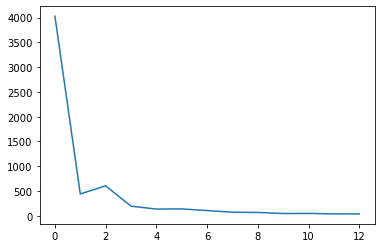

(279, 13, 20)
260
(279, 260)


In [96]:
X_train, X_test, y_train, y_test=get_train_test()
print(X_train.shape)
tot_no_MFCC=X_train.shape[1]*X_train.shape[2]
print(tot_no_MFCC)
X_train=X_train.reshape((X_train.shape[0],tot_no_MFCC))
print(X_train.shape)
y_train_hot=to_categorical(y_train)
#y_test_hot=to_categorical(y_test)

In [97]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD

Epoch 1/40
279/279 [==============================] - 0s 1ms/step - loss: 1.9742 - accuracy: 0.1505
Epoch 2/40
279/279 [==============================] - 0s 728us/step - loss: 1.9167 - accuracy: 0.1649
Epoch 3/40
279/279 [==============================] - 0s 663us/step - loss: 1.8342 - accuracy: 0.2079
Epoch 4/40
279/279 [==============================] - 0s 892us/step - loss: 1.8125 - accuracy: 0.2832
Epoch 5/40
279/279 [==============================] - 0s 616us/step - loss: 1.8083 - accuracy: 0.2867
Epoch 6/40
279/279 [==============================] - 0s 774us/step - loss: 1.7920 - accuracy: 0.3226
Epoch 7/40
279/279 [==============================] - 0s 713us/step - loss: 1.7766 - accuracy: 0.3477
Epoch 8/40
279/279 [==============================] - 0s 634us/step - loss: 1.7513 - accuracy: 0.3728
Epoch 9/40
279/279 [==============================] - 0s 731us/step - loss: 1.7333 - accuracy: 0.3620
Epoch 10/40
279/279 [==============================] - 0s 695us/step - loss: 1.7310 

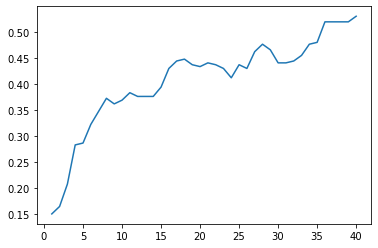

In [98]:
network=Sequential()
network.add(Dense(64, activation='tanh', input_shape=(tot_no_MFCC,)))
network.add(Dense(32, activation='tanh'))
network.add(Dense(16, activation='tanh'))
#network.add(Dense(16, activation='tanh'))
network.add(Dense(7, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.1, decay=0.01)
network.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
#network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=network.fit(X_train, y_train_hot, epochs=40, batch_size=5)



accuracy=history.history['accuracy']
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy)
plt.show()

In [99]:
n_classes=7
from sklearn.metrics import roc_curve, auc
y_pred = network.predict(X_train)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_hot[:, i],y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

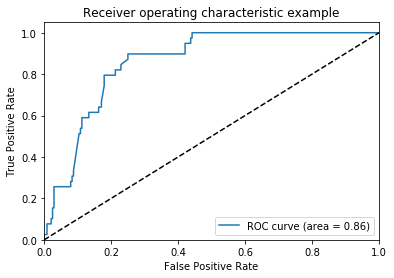

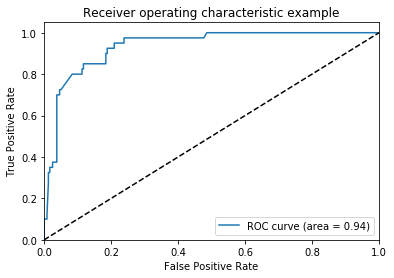

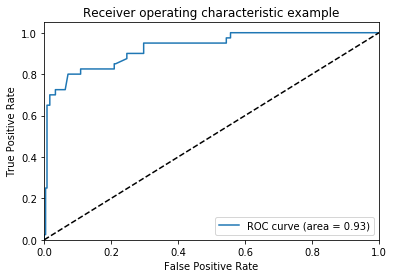

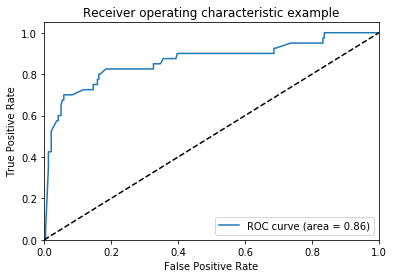

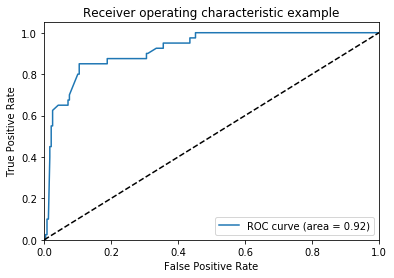

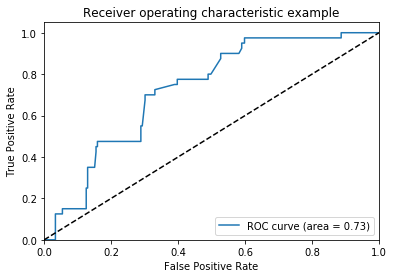

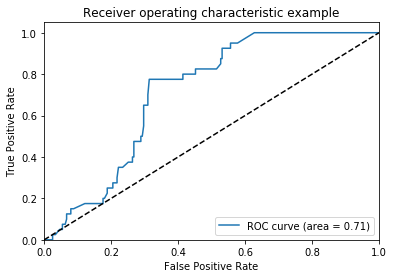

In [100]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()